In [9]:
#a5
import numpy as np
import pandas as pd
import math
df = pd.read_excel("lab5.xlsx")
np.random.seed(0)
weights = np.random.rand(4) 
bias = np.random.rand(1)
learning_rate = 0.01
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
labels = np.array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0]) 
epochs = 10000
for epoch in range(epochs):
    z = np.dot(df, weights) + bias
    predicted_labels = sigmoid(z)
    loss = -np.mean(labels * np.log(predicted_labels) + (1 - labels) * np.log(1 - predicted_labels))
    dw = np.dot(df.T, (predicted_labels - labels)) / len(df)
    db = np.sum(predicted_labels - labels) / len(df)
    weights -= learning_rate * dw
    bias -= learning_rate * db
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}: Loss = {loss}")
print("Final Weights:", weights)
print("Final Bias:", bias)

ValueError: shapes (10,6) and (4,) not aligned: 6 (dim 1) != 4 (dim 0)

Epoch 1: Mean Squared Error = 94.83802816901408
Epoch 2: Mean Squared Error = 0.0
Convergence reached. Training stopped.
Final Weights:
W0 = -0.05000000000000765, W1 = -0.1691227567382155, W2 = -0.6337468920679394


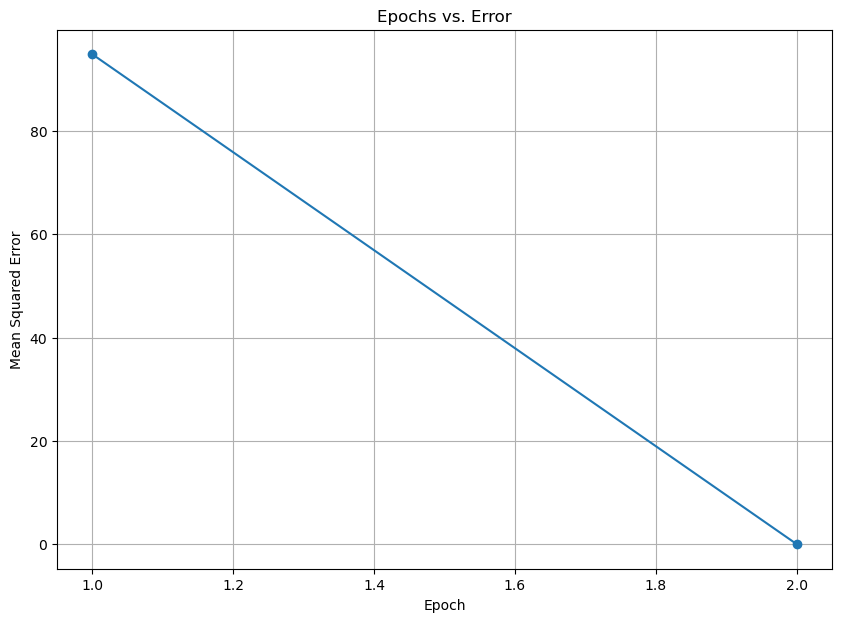

In [14]:
#a1
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
df=pd.read_excel("embeddingdata.xlsx")
# Initialsing the weights and learning rate that is alpha
W0 = 10
W1 = 0.2
W2 = -0.75
learning_rate = 0.05
# Splitting the data into test and train
binary_df = df[df['Label'].isin([0, 1])]
X = binary_df[['embed_3', 'embed_4']].values  # Convert DataFrame columns to a NumPy array
y = binary_df['Label'].values
# Split the data into training and test sets (70% training, 30% test)
Tr_X, Te_X, Tr_y, Te_y = train_test_split(X, y, test_size=0.3, random_state=42)
# Define the step activation function
def step_activation(x):
    return 1 if x >= 0 else 0
# Initialize weights
weights = np.array([W0, W1, W2])
# Initialize the number of epochs and convergence condition
max_epochs = 1000
convergence_error = 0.002
# Lists to store epoch and error values for plotting
epoch_list = []
error_list = []
# Training loop
for epoch in range(max_epochs):
    error_sum = 0
    for i in range(len(Tr_X)):
        # Compute the weighted sum
        weighted_sum = np.dot(weights, np.insert(Tr_X[i], 0, 1))
        # Apply the step activation function
        prediction = step_activation(weighted_sum)
        # Compute the error
        error = Tr_y[i] - prediction
        error_sum += error
        # Update the weights
        weights += learning_rate * error * np.insert(Tr_X[i], 0, 1)
    # Calculate the sum-squared error
    mse = (error_sum ** 2) / len(Tr_X)
    # Append epoch and error values to lists for plotting
    epoch_list.append(epoch + 1)
    error_list.append(mse)
    # Print the error for this epoch
    print(f"Epoch {epoch + 1}: Mean Squared Error = {mse}")
    # Check for convergence
    if mse <= convergence_error:
        print("Convergence reached. Training stopped.")
        break
# Print the final weights
print("Final Weights:")
print(f"W0 = {weights[0]}, W1 = {weights[1]}, W2 = {weights[2]}")
# Plot epochs against error values
plt.figure(figsize=(10, 7))
plt.plot(epoch_list, error_list, marker='o')
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.title("Epochs vs. Error")
plt.grid(True)
plt.show()